Segundo momento Evaluativo  
Realiza los ejercicios únicamente utilizando los temas desarrollados en clase y tareas. 
1.- Atenúa el ruido en la imagen ruido.jpg tal cual se ve en el ejemplo:

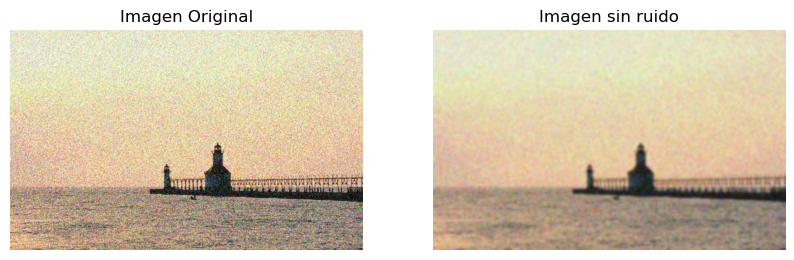

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Cargar la imagen con aliasing
img = cv2.imread("ruido.jpg")

# Aplicar un filtro de suavizado para reducir el aliasing
img_suavizada = cv2.GaussianBlur(img, (15, 15), 0)

# Mostrar la imagen original y la imagen suavizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_suavizada, cv2.COLOR_BGR2RGB))
plt.title('Imagen sin ruido')
plt.axis('off')

plt.show()


2.- Usando la imagen “rosa.png” obtenga el siguiente resultado:

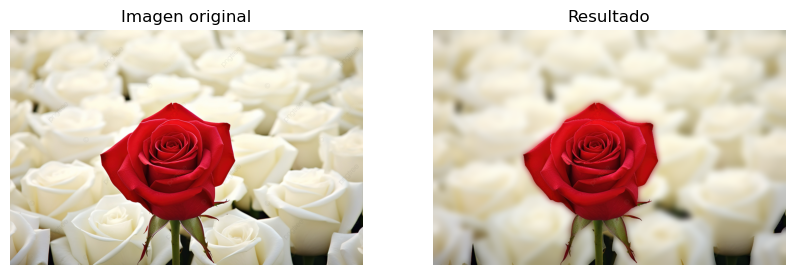

In [111]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread('rosa.png')
imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbral_inc_bi = cv2.threshold(imagen_gray, 127, 255, cv2.THRESH_BINARY_INV) 
_, a = cv2.threshold(umbral_inc_bi, 127, 255, cv2.THRESH_BINARY_INV ) 

_, umbralbi = cv2.threshold(imagen_gray, 127, 255, cv2.THRESH_BINARY )

_,umb_tozero_inv=cv2.threshold(imagen_gray,127,255,cv2.THRESH_TOZERO_INV)

mascara = np.zeros_like(umbralbi, dtype=np.uint8)

contornos, _ = cv2.findContours(umbralbi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

img_desenfocada = cv2.GaussianBlur(imagen, (55, 55), 0)

# Crear la imagen resultante aplicando la máscara desenfocada a la imagen original
img_resultante = np.copy(imagen)
img_resultante[mascara != 0] = img_desenfocada[mascara != 0]

plt.figure(figsize=(10, 5))

# Referencia al array de las imágenes
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_resultante, cv2.COLOR_BGR2RGB))
plt.title('Resultado')
plt.axis('off')



plt.show()


3.- Usando la imagen “Elementos jpg” obtenga el siguiente resultado. 

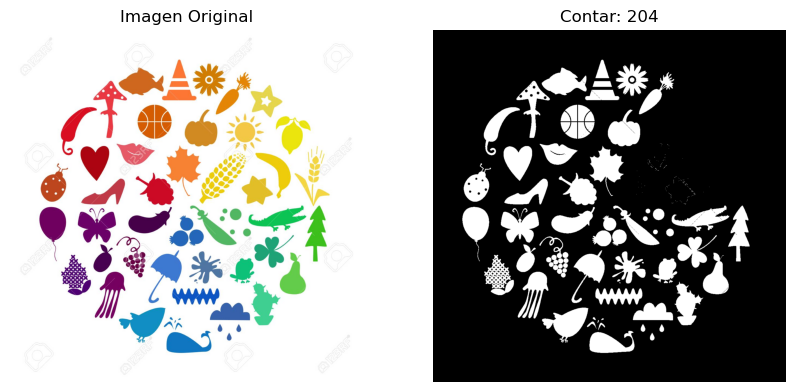

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _,Umbral_inve_bi = cv2.threshold(img_gris,160,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours
    contornos, _ = cv2.findContours(Umbral_inve_bi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image
    img_contornos = cv2.drawContours(img.copy(), contornos, -1, (0, 255, 0), 3)
    
    # Count the number of contours
    cont = len(contornos)
    
    return cont, img_contornos,Umbral_inve_bi

# Leer la imagen
image = cv2.imread('elementos.jpg')

# Get the count and image with contours
img_cont, img_with_contours,umbral_inve_bi = contar(image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(umbral_inve_bi, cv2.COLOR_BGR2RGB))
plt.title(f'Contar: {img_cont}')
plt.axis('off')

plt.show()



4.- Usando la imagen Cristo obtiene el siguiente resultado (utiliza máscaras de 
convolución)

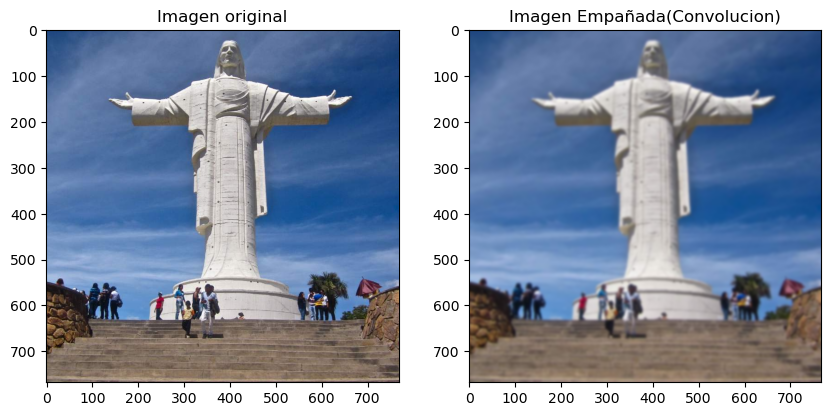

In [13]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('cristo.jpg')

# Crear una máscara inicial con todas las regiones marcadas como fondo
mask = np.zeros(imagen.shape[:2], np.uint8)

# Definir una región de interés (ROI) que rodea aproximadamente a la persona en la imagen
rect = (50, 50, imagen.shape[1]-50, imagen.shape[0]-50)

# Aplicar el algoritmo GrabCut para segmentar la imagen en primer plano y fondo
bgd_model = np.zeros((1,65),np.float64)
fgd_model = np.zeros((1,65),np.float64)
cv2.grabCut(imagen, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Crear una máscara donde los píxeles marcados como probablemente fondo y fondo se convierten en cero
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

# Aplicar un desenfoque gaussiano al fondo de la imagen
background = cv2.GaussianBlur(imagen, (15, 15), 0)

# Multiplicar la máscara por la imagen original para mantener solo el primer plano
foreground = cv2.multiply(imagen, cv2.merge((mask2, mask2, mask2)))

# Combinar el primer plano y el fondo desenfocado
img_resultante = cv2.add(foreground, background)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title('Imagen Empañada(Convolucion)')


plt.show()
